<a href="https://colab.research.google.com/github/sankettgorey/Customer-Segmentation/blob/main/Copy_of_Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [4]:
url = '/content/gdrive/MyDrive/Clustering Project/Online Retail.xlsx'
df = pd.read_excel(url)

In [5]:
# printing the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
# printing additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.shape

(541909, 8)

In [10]:
# printing null values
df.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# dropping null values
df.dropna(inplace = True)

In [12]:
df.shape

(406829, 8)

In [13]:
# checking suplicated
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


* We can see there are 5268 duplcate rows. We will drop these duplicate values

In [14]:
# dropping duplicates
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(401604, 8)

# Exploratory Data Analysis

In [16]:
plt.rcParams['figure.figsize'] = 12, 8
# sns.set(style = 'whitegrid')

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# checking dtypes
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
# checking total no of unique invoive no
df['InvoiceNo'] =  df.InvoiceNo.astype('string')

* Looking for calcelled orders. Calcelled orders start with 'C' in the invoice Number

In [20]:
df.dtypes

InvoiceNo              string
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [21]:
df[df.InvoiceNo.str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
# dropping the cancelled orders
df = df[~df['InvoiceNo'].str.contains('C')]

In [23]:
# shape of df after dropping calcelled orders
df.shape

(392732, 8)

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


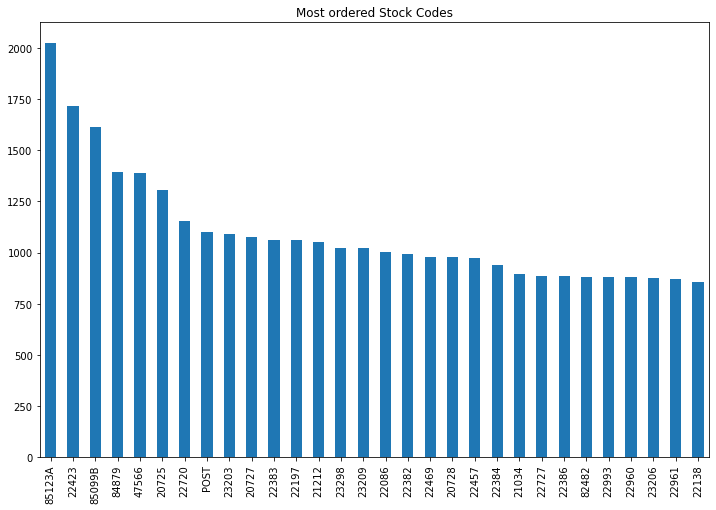

In [25]:
# printing most ordered sotck code in the descending order. First 30 are plotted
df.StockCode.value_counts().head(30).plot.bar();
plt.title('Most ordered Stock Codes');
plt.xticks(rotation = 90);

In [26]:
# converting the invoice datatype to datetime format
df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])

In [27]:
df.dtypes

InvoiceNo              string
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [28]:
# creating new column of year from invoide date
df['year'] = df.InvoiceDate.dt.year

In [29]:
#fetching Day from InvoiceDate and storing in column 'Day'
df['Day']=df['InvoiceDate'].dt.day

In [30]:
# creating column of month
df['Month'] = df.InvoiceDate.dt.month

* In the InvoiceDate column, time of the oder has also given. So, let's create the columns of hour and minute

In [31]:
# creating hour column
df['Hour'] = df.InvoiceDate.dt.hour

# column of minute
df['Minute'] = df.InvoiceDate.dt.minute

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Day,Month,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26


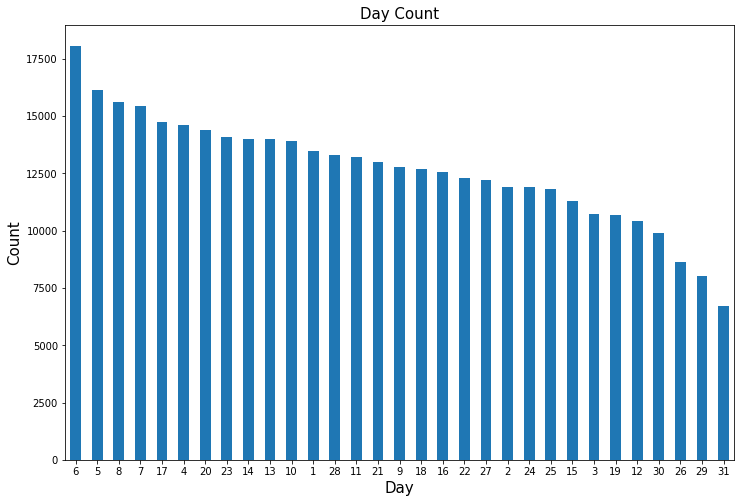

In [33]:
df['Day'].value_counts().plot.bar(rot = 0);
plt.title('Day Count', fontsize = 15);
plt.xlabel('Day', fontsize = 15);
plt.ylabel('Count', fontsize = 15);

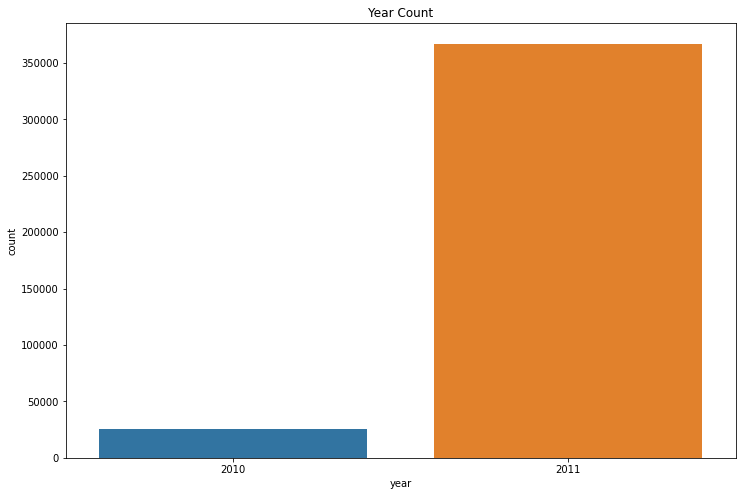

In [34]:
# plotting year
sns.countplot(df.year);
plt.title('Year Count');

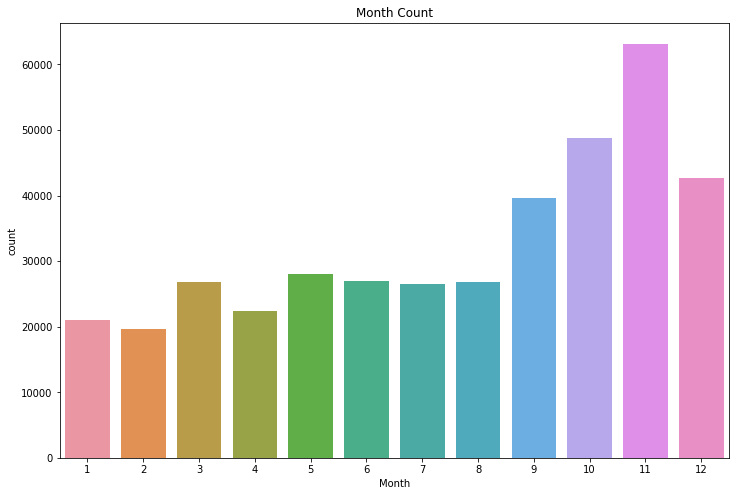

In [35]:
# plotting months
sns.countplot(df.Month);
plt.title('Month Count');

* 10th and 11th Month of the year see highest orders.
* 12th Month sees lowest purchase

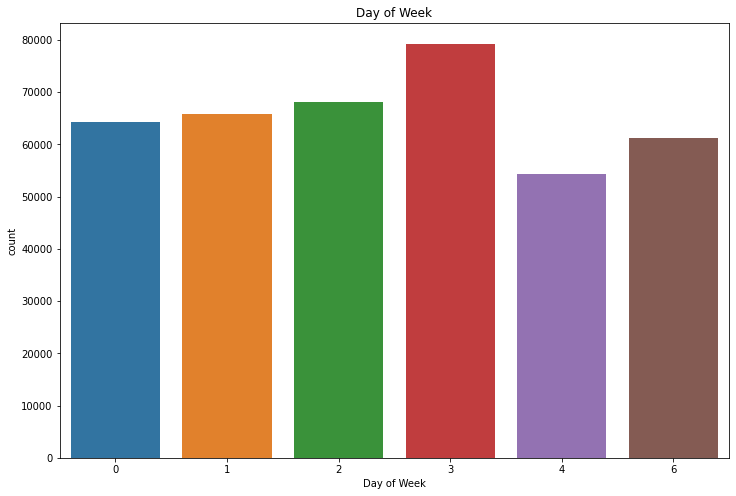

In [36]:
# plotting day of week count
sns.countplot(df.InvoiceDate.dt.dayofweek);
plt.xlabel('Day of Week');
plt.title('Day of Week');

* 3rd Day of the week shoes highest purchase whereas weekends show fairly same purchase rates.

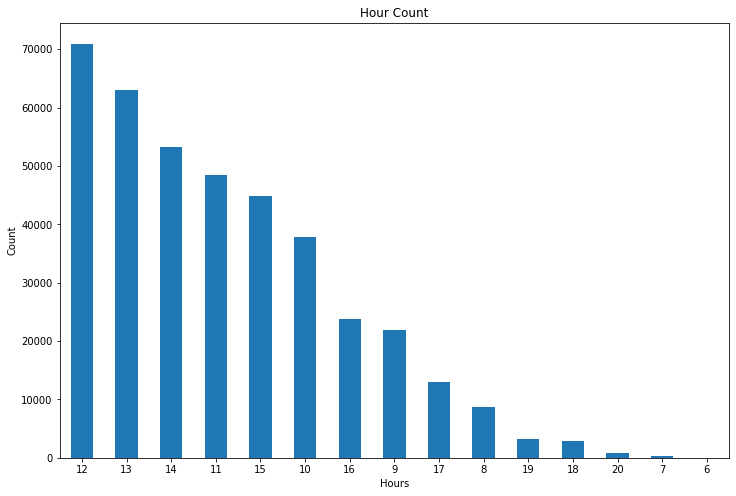

In [37]:
# plotting hours
df.Hour.value_counts().plot.bar(rot = 0);
plt.xlabel('Hours');
plt.ylabel('Count');
plt.title('Hour Count');

* 12th, 13th and 14th hours show maximum purchase rates whereas morning hours show lamost no purchases.

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Day,Month,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26


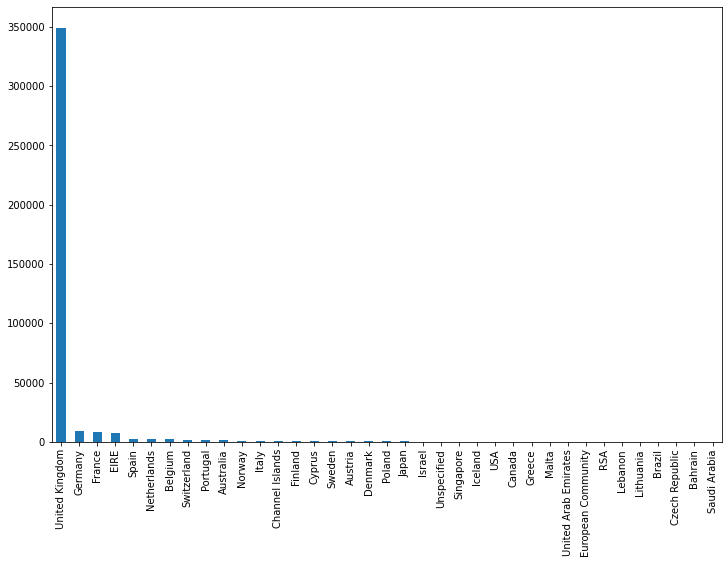

In [39]:
df['Country'].value_counts().plot.bar();

* We can see that maximum customers are from UK.

* Here, total amount spent is not given which would be important from analysis point of view as this will give us the how much amount is spent by the particular customer.
* So, now we will create total amount spent which will be the product of quantity and price. 

In [40]:
df['Total_Amount_Spent'] = df['Quantity'] * df['UnitPrice']

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Day,Month,Hour,Minute,Total_Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34


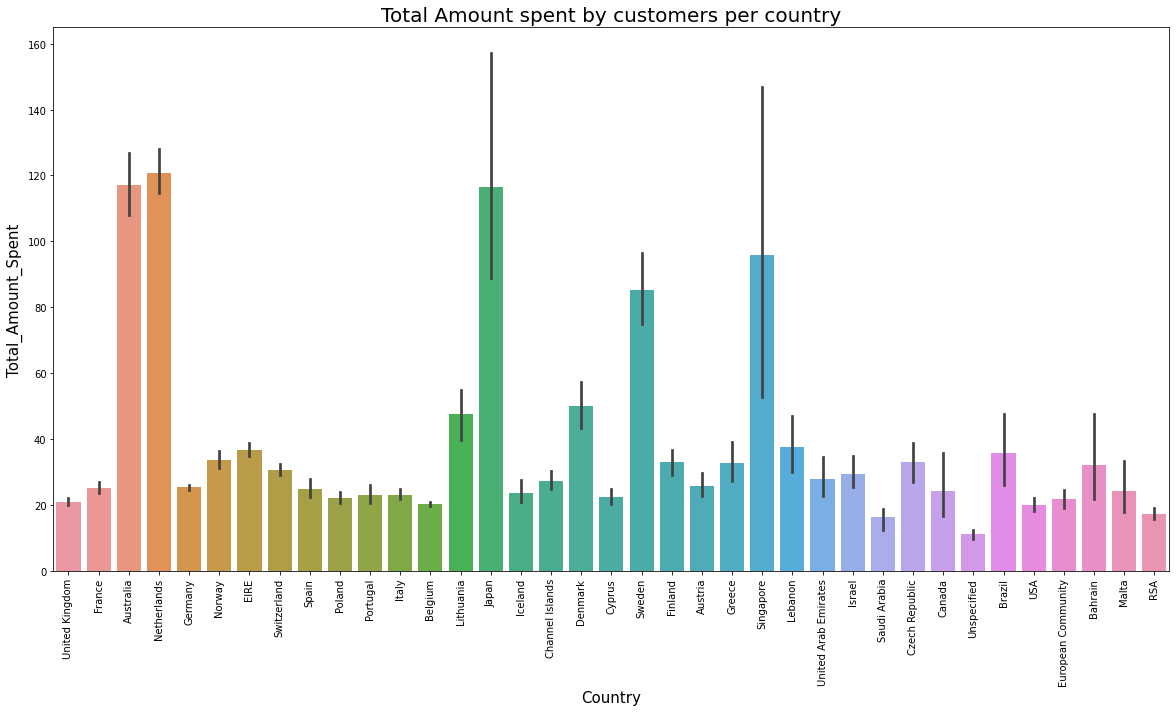

In [42]:
# total amount spent by customers per country
plt.subplots(figsize = (20, 10));
sns.barplot(x = df.Country, y = df.Total_Amount_Spent);
plt.xticks(rotation = 90);
plt.xlabel('Country', fontsize = 15);
plt.ylabel('Total_Amount_Spent', fontsize = 15);
plt.title('Total Amount spent by customers per country', fontsize = 20);

* Netherlands is the highest amount spender followed by Australia and Japan.
* Republic of Sounth Africa (RSA) and Malta have the least purchase history.

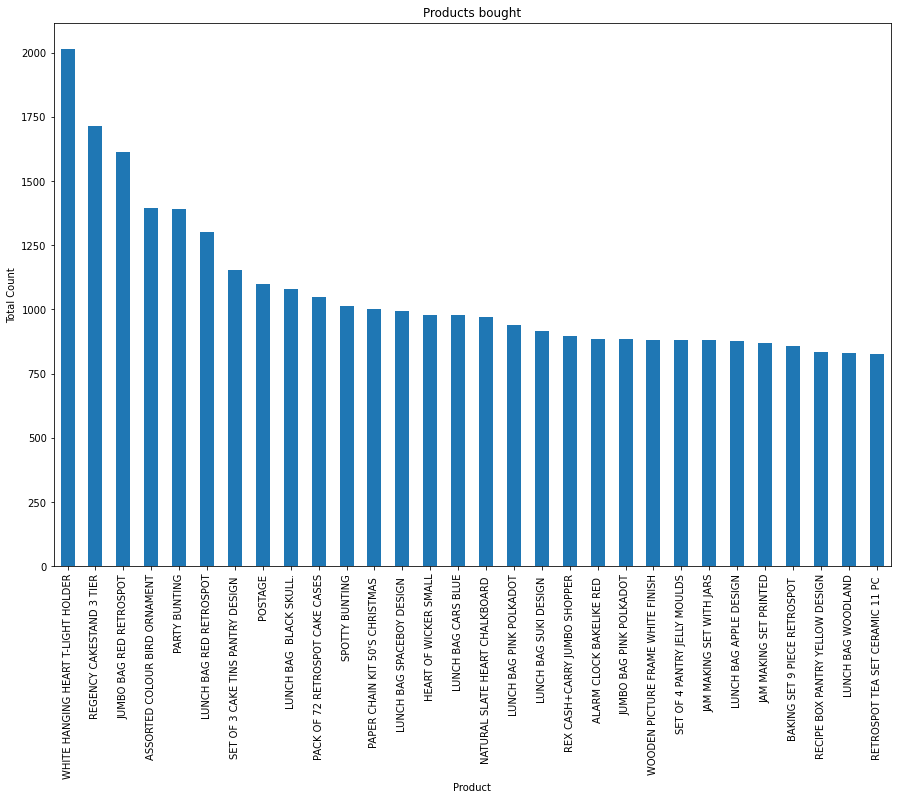

In [43]:
plt.subplots(figsize = (15, 10));
df.Description.value_counts().head(30).plot.bar();
plt.xlabel('Product');
plt.ylabel('Total Count');
plt.title('Products bought');

# Data Preparation

* There are many ways in which we can cluster or group the given data. But, as the given in the problem statement, company mainly sells unique all occasion gifts, it would be wise to cluster the given data by:
    * Monetary: Total amount of transactions made by the customer
    * Frequency: Total number of transactions
    * Recency: Number of days since last purchase

* This is famously called RFM (Recency-Frequency-Monetary) clustering.

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Day,Month,Hour,Minute,Total_Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34


In [45]:
# calculating total amount spent by customers in a year
monetary = df.groupby('CustomerID')['Total_Amount_Spent'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Total_Amount_Spent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [46]:
# calculating the frequency of transactions made by customers
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [47]:
# merging frequency and monetary df
merged = pd.merge(frequency, monetary, on = 'CustomerID', how = 'inner')
merged.head()

,CustomerID,Frequency,Total_Amount_Spent
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [48]:
# now calculating the recency of the transactions
max(df['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [49]:
max(df['InvoiceDate']) - df['InvoiceDate']

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: InvoiceDate, Length: 392732, dtype: timedelta64[ns]

In [50]:
# Now Computing the difference between max date and transaction date
df['Difference'] = max(df['InvoiceDate']) - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Day,Month,Hour,Minute,Total_Amount_Spent,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,20.34,373 days 04:24:00


In [51]:
# caluculating the last transaction for recency feature
temp = df.groupby('CustomerID')['Difference'].min()
temp = temp.reset_index()
temp.head()

,CustomerID,Difference
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [52]:
# extracting days from the datetime
temp['Difference'] = temp.Difference.dt.days

In [53]:
temp.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [54]:
# merging the recency with previously calculated frequency and total amount spent
merged = pd.merge(merged, temp, on = 'CustomerID', how = 'inner')

In [55]:
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Difference
0,12346.0,1,77183.60,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [56]:
# changing the column names
merged.columns = ['CustomerID', 'Frequency', 'Toal_Amount_Spent', 'Recency']

In [57]:
merged.head()

,CustomerID,Frequency,Toal_Amount_Spent,Recency
0,12346.0,1,77183.60,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


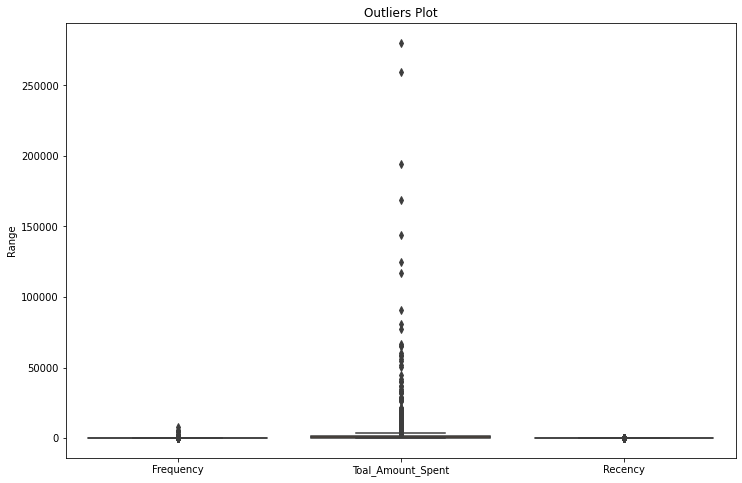

In [58]:
# plotting the boxplot to see outliers
sns.boxplot(data = merged.drop(['CustomerID'], axis = 1));
plt.ylabel('Range');
plt.title('Outliers Plot');

* There are many outliers in the above graph. These cause problem in the analysis. So, we will remove the outliers using statistical methods.

In [59]:
# Removing (statistical) outliers for Amount
Q1 = merged.Toal_Amount_Spent.quantile(0.05)
Q3 = merged.Toal_Amount_Spent.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.Toal_Amount_Spent >= Q1 - 1.5*IQR) & (merged.Toal_Amount_Spent <= Q3 + 1.5*IQR)]

In [60]:
# Removing (statistical) outliers for Frequency
Q1 = merged.Frequency.quantile(0.05)
Q3 = merged.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = merged[(merged.Frequency >= Q1 - 1.5*IQR) & (merged.Frequency <= Q3 + 1.5*IQR)]

In [61]:
# Removing (statistical) outliers for Recency
Q1 = merged.Recency.quantile(0.05)
Q3 = merged.Recency.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(rfm.Recency >= Q1 - 1.5*IQR) & (merged.Recency <= Q3 + 1.5*IQR)]

In [62]:
merged.head()

,CustomerID,Frequency,Toal_Amount_Spent,Recency
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
5,12352.0,85,2506.04,35


In [63]:
merged = merged.rename(columns = {'Toal_Amount_Spent': 'Total_Amount_Spent'})

In [64]:
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
5,12352.0,85,2506.04,35


In [65]:
merged.shape

(4258, 4)

* Now let's look at the distribution of each of the columns.

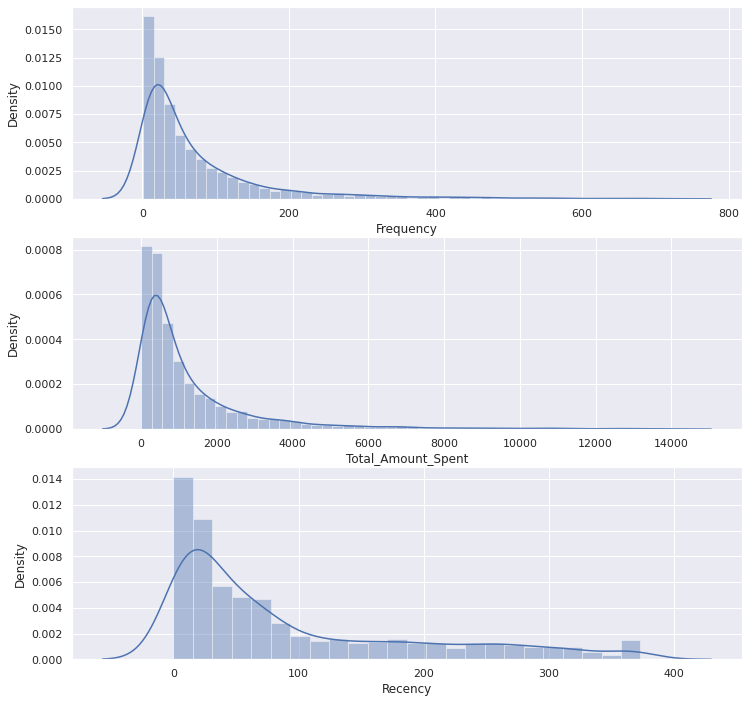

In [66]:
plt.subplots(3, 1, figsize = (12, 12));
sns.set(style = 'darkgrid');

# distribution of Frequency
plt.subplot(3, 1, 1);
sns.distplot(merged.Frequency);
# plt.title('Frequency Distribution');

# distribution of Total amount
plt.subplot(3, 1, 2);
sns.distplot(merged.Total_Amount_Spent);
# plt.title('Total Amount Spent Distribution');

# distribution of recency
plt.subplot(3, 1, 3);
sns.distplot(merged.Recency);
# plt.title('Recency Distribution');

In [67]:
# importing library to scale the values
import math

In [68]:
# defining a function to take the log
def log(x):
  return math.log1p(x)

In [69]:
# creating new column and taking log
merged['Total_Amount_log'] = merged['Total_Amount_Spent'].apply(math.log1p)
merged['Frequency_log'] = merged['Frequency'].apply(math.log1p)
merged['Recency_log'] = merged['Recency'].apply(math.log1p)

In [70]:
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency,Total_Amount_log,Frequency_log,Recency_log
1,12347.0,182,4310.00,1,8.368925,5.209486,0.693147
2,12348.0,31,1797.24,74,7.494564,3.465736,4.317488
3,12349.0,73,1757.55,18,7.472245,4.304065,2.944439
4,12350.0,17,334.40,309,5.815324,2.890372,5.736572
5,12352.0,85,2506.04,35,7.826858,4.454347,3.583519


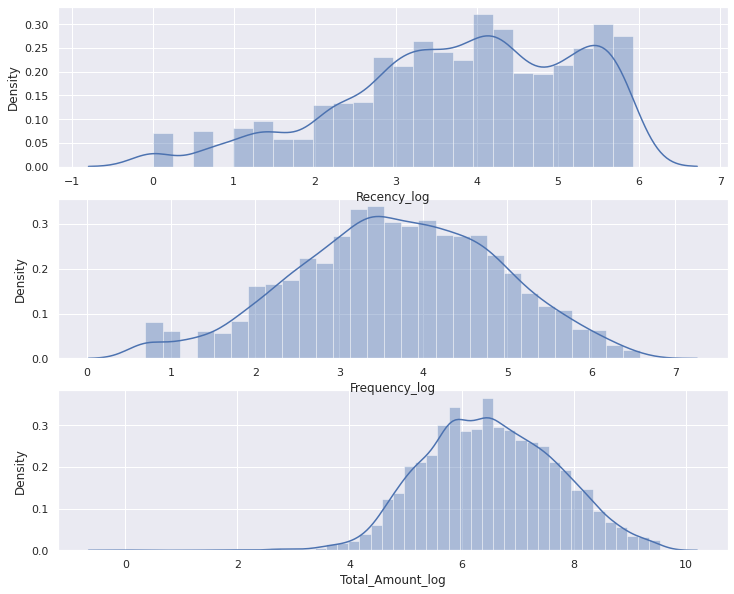

In [71]:
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 3); 
sns.distplot(merged['Total_Amount_log']);

# Plot distribution of var2
plt.subplot(3, 1, 2); 
sns.distplot(merged['Frequency_log']);

# Plot distribution of var3
plt.subplot(3, 1, 1); 
sns.distplot(merged['Recency_log']);

In [72]:
# now caling the attributes
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
# creating new df of log columns
final_df = merged[['Recency_log', 'Frequency_log', 'Total_Amount_log']]

In [75]:
final_df.head()

,Recency_log,Frequency_log,Total_Amount_log
1,0.693147,5.209486,8.368925
2,4.317488,3.465736,7.494564
3,2.944439,4.304065,7.472245
4,5.736572,2.890372,5.815324
5,3.583519,4.454347,7.826858


In [76]:
# transforming the data
final_df_scaled = scaler.fit_transform(final_df)
final_df_scaled

array([[-2.21889642,  1.26860627,  1.58139301],
       [ 0.36363229, -0.1833749 ,  0.83339109],
       [-0.6147356 ,  0.51468275,  0.81429772],
       ...,
       [-1.23109062, -0.93343937, -1.14012286],
       [-1.72499352,  2.41148827,  0.944037  ],
       [-0.03275143,  0.48022222,  0.8522305 ]])

In [77]:
# converting the scaled array into dataframe
final_df_scaled = pd.DataFrame(final_df_scaled)

In [78]:
final_df_scaled.head()

,0,1,2
0,-2.218896,1.268606,1.581393
1,0.363632,-0.183375,0.833391
2,-0.614736,0.514683,0.814298
3,1.374803,-0.662468,-0.603171
4,-0.159358,0.639819,1.117663


In [79]:
final_df_scaled.columns = ['Recency_log',	'Frequency_log',	'Total_Amount_log']

In [80]:
final_df_scaled.head()

,Recency_log,Frequency_log,Total_Amount_log
0,-2.218896,1.268606,1.581393
1,0.363632,-0.183375,0.833391
2,-0.614736,0.514683,0.814298
3,1.374803,-0.662468,-0.603171
4,-0.159358,0.639819,1.117663


# Building the Model

# K-Means Clustering

In [81]:
from sklearn.cluster import KMeans

* We will initiate the algorithm with 5 clusters randomly. And after fitting the data, we will fine tune the algorithm with optimal number of clusters.

In [82]:
# instantiating the algo with 5 clusters initially
kmeans = KMeans(n_clusters = 5, random_state = 0)

In [83]:
kmeans.fit(final_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [84]:
# printing the cluster number for each data point
kmeans.labels_

array([2, 1, 1, ..., 3, 2, 1], dtype=int32)

# Elbow Mwthod

* We will run the model for clusters rangin from 1 to 20 and store the cluster number and its squared distance in a dictionary and then plot the Elbow Method Plot.

In [85]:
score = {}

for k in range(1, 21):

  # initialize k-means algo with the no of clusters
  kmeans = KMeans(n_clusters = k, random_state = 1)

  # fitting the data
  kmeans.fit(final_df_scaled)

  # appending the score with respective k
  score[k] = kmeans.inertia_

In [86]:
# printing the score dictionary
score

{1: 12774.000000000002,
 2: 6639.961200304347,
 3: 5167.307770793525,
 4: 4270.728180154217,
 5: 3616.6718865811386,
 6: 3248.2680398958137,
 7: 2913.5039072476147,
 8: 2691.227871289762,
 9: 2500.7241461523067,
 10: 2323.105916522317,
 11: 2169.888961364046,
 12: 2051.209796893812,
 13: 1952.206147915741,
 14: 1860.7110936397048,
 15: 1785.1019666827588,
 16: 1717.4202596164953,
 17: 1659.0678984927702,
 18: 1600.0827026398988,
 19: 1548.8521537606312,
 20: 1498.3170499459136}

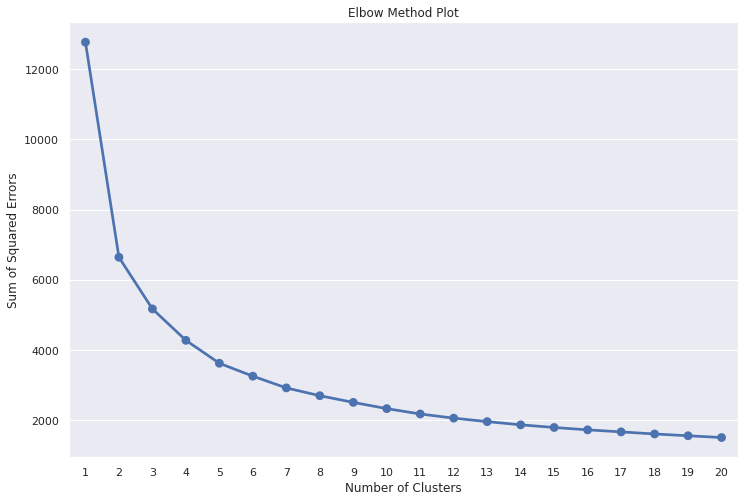

In [87]:
# Now plotting the above values
sns.pointplot(x = list(score.keys()), y = list(score.values()));
plt.title('Elbow Method Plot');
plt.xlabel('Number of Clusters');
plt.ylabel('Sum of Squared Errors');

* Now performing Silhouette Analysis

In [90]:
lst = ['Recency_log',	'Frequency_log',	'Total_Amount_log']

X_features = final_df[lst].values

scaler = StandardScaler()

X = scaler.fit_transform(X_features)

# INITIATING KMEANS WITH 3 CLUSTERS
kmeans = KMeans(n_clusters = 3)

kmeans.fit(X)

y_means = kmeans.predict(X)

In [91]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

# defining emepty list to append cluster no
cluster_no = []

# defining silhouette list to append silhouette score value
silhouette = []

range_n_clusters = list(range(2, 23))
for n_clusters in range_n_clusters:
    cluster_no.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(final_df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(final_df_scaled, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3977835556410437
For n_clusters = 3, silhouette score is 0.29657184765913436
For n_clusters = 4, silhouette score is 0.30134898440178576
For n_clusters = 5, silhouette score is 0.2785390813954964
For n_clusters = 6, silhouette score is 0.27256005621209906
For n_clusters = 7, silhouette score is 0.26480983004722536
For n_clusters = 8, silhouette score is 0.25743449416573466
For n_clusters = 9, silhouette score is 0.2619514628023778
For n_clusters = 10, silhouette score is 0.271430931373284
For n_clusters = 11, silhouette score is 0.2677563131875431
For n_clusters = 12, silhouette score is 0.2607980987027197
For n_clusters = 13, silhouette score is 0.2577972789619222
For n_clusters = 14, silhouette score is 0.2506355342342421
For n_clusters = 15, silhouette score is 0.24961627166148262
For n_clusters = 16, silhouette score is 0.24680583844679965
For n_clusters = 17, silhouette score is 0.25380121916360154
For n_clusters = 18, silhouette score is 

For n_clusters = 2 The average silhouette_score is : 0.3978520528350761
For n_clusters = 3 The average silhouette_score is : 0.2953720016593043
For n_clusters = 4 The average silhouette_score is : 0.3010950472108101
For n_clusters = 5 The average silhouette_score is : 0.2785501200368377
For n_clusters = 6 The average silhouette_score is : 0.2742231069855626


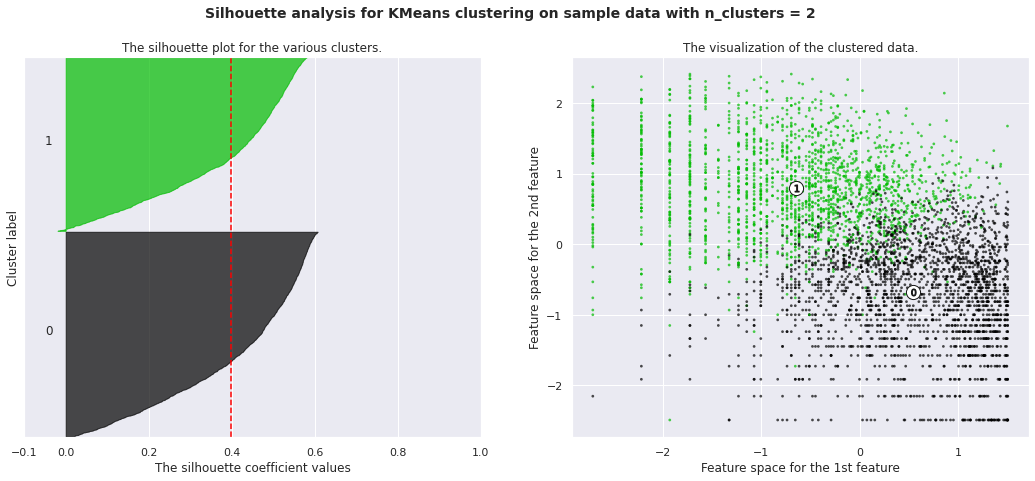

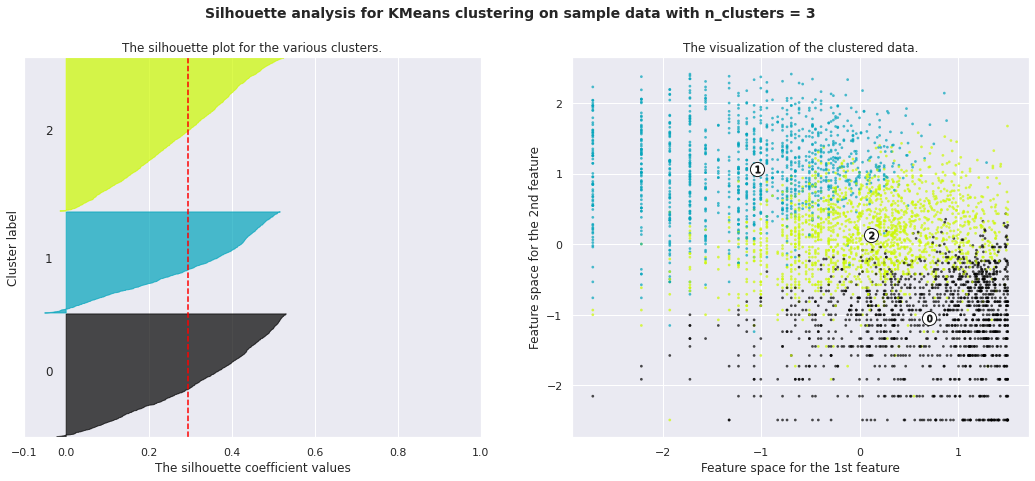

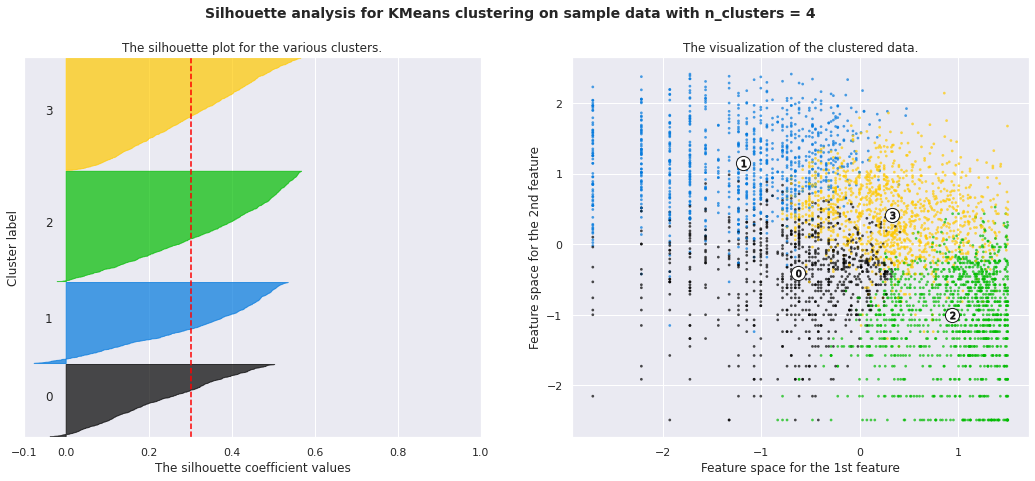

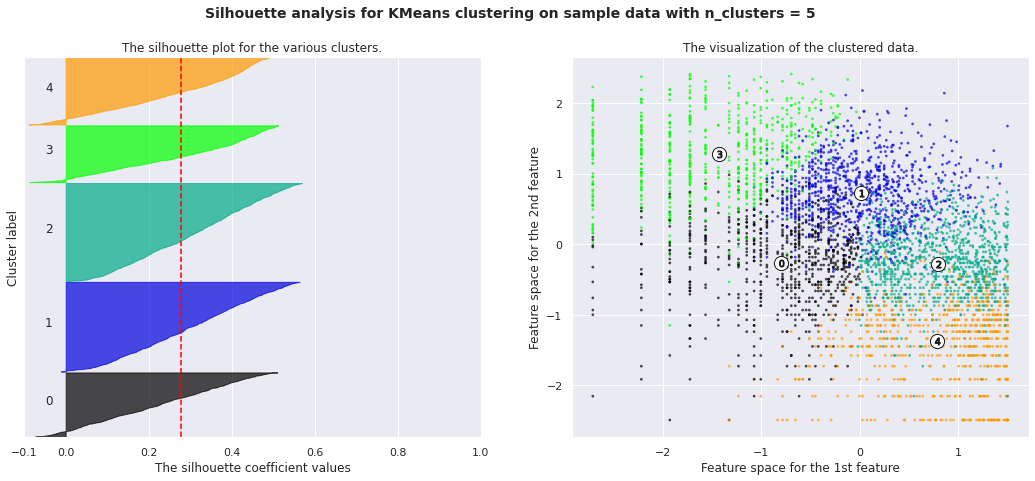

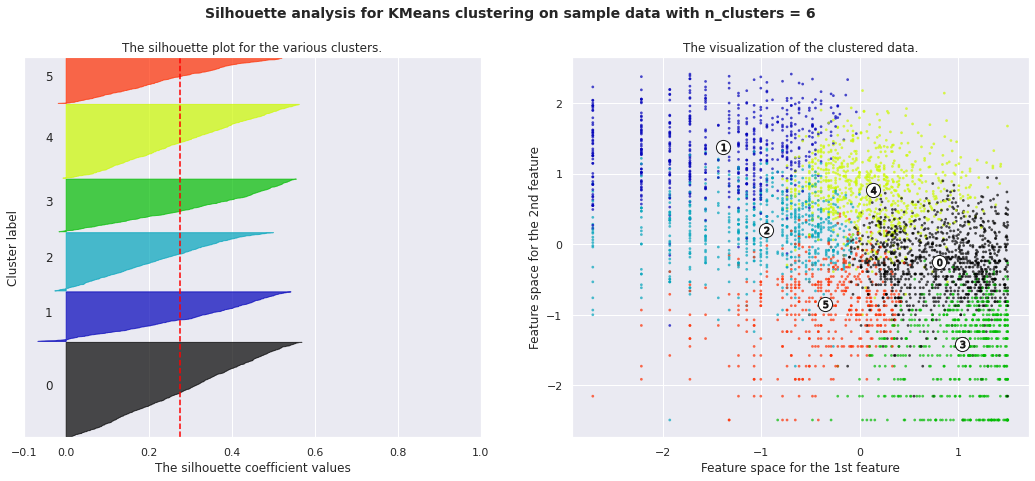

In [92]:

from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(final_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(final_df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(final_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

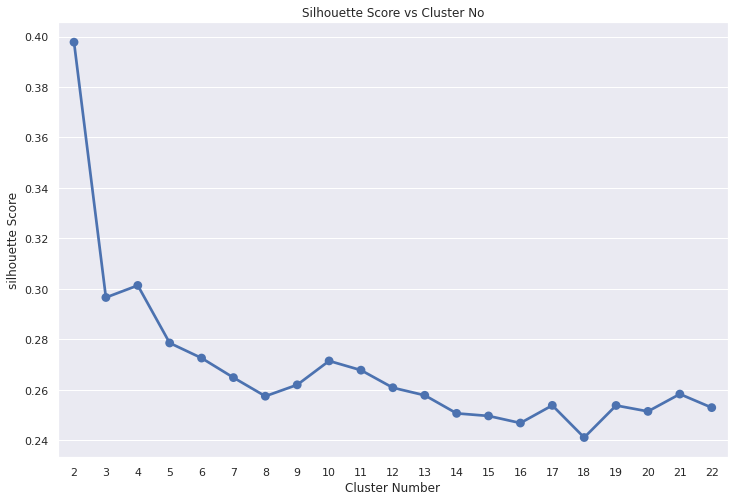

In [93]:
sns.pointplot(cluster_no, silhouette);
plt.xlabel('Cluster Number');
plt.ylabel('silhouette Score');
plt.title('Silhouette Score vs Cluster No');

Making clusters based on RFM (Recency, Frequency, Monetory)

In [94]:
final_df.head()

,Recency_log,Frequency_log,Total_Amount_log
1,0.693147,5.209486,8.368925
2,4.317488,3.465736,7.494564
3,2.944439,4.304065,7.472245
4,5.736572,2.890372,5.815324
5,3.583519,4.454347,7.826858


In [95]:
y_means

array([1, 2, 1, ..., 0, 1, 2], dtype=int32)

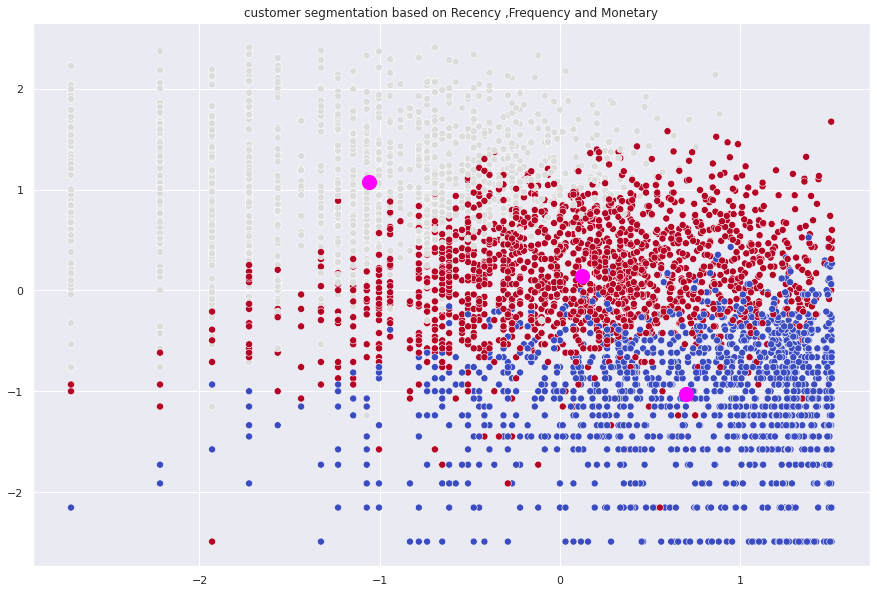

In [96]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
sns.scatterplot(X[:, 0], X[:, 1], c=y_means, s=50, cmap = 'coolwarm');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Magenta', s=200, cmap = 'coolwarm');

In [97]:
# creating final model with 3 clusters
kmeans = KMeans(n_clusters = 3)

In [98]:
# fitting the data with 3 clusters
kmeans.fit(final_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
# cluster numbers
kmeans.labels_

array([2, 0, 2, ..., 1, 2, 0], dtype=int32)

In [100]:
# creating new column in original df with cluster numbers
merged['Cluster_no'] = kmeans.labels_
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency,Total_Amount_log,Frequency_log,Recency_log,Cluster_no
1,12347.0,182,4310.00,1,8.368925,5.209486,0.693147,2
2,12348.0,31,1797.24,74,7.494564,3.465736,4.317488,0
3,12349.0,73,1757.55,18,7.472245,4.304065,2.944439,2
4,12350.0,17,334.40,309,5.815324,2.890372,5.736572,1
5,12352.0,85,2506.04,35,7.826858,4.454347,3.583519,2


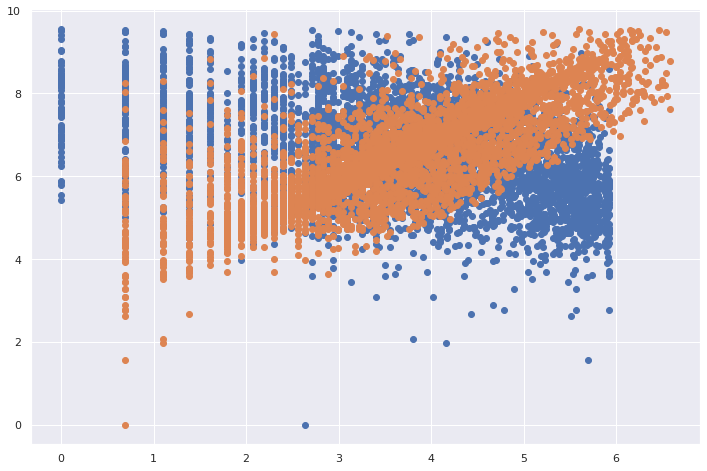

In [101]:
plt.scatter(merged.Recency_log, merged.Total_Amount_log);
plt.scatter(merged.Frequency_log, merged.Total_Amount_log);

* We will plot 3D interactive plot with plotly to better understand

In [102]:
import plotly.express as px

In [103]:
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency,Total_Amount_log,Frequency_log,Recency_log,Cluster_no
1,12347.0,182,4310.00,1,8.368925,5.209486,0.693147,2
2,12348.0,31,1797.24,74,7.494564,3.465736,4.317488,0
3,12349.0,73,1757.55,18,7.472245,4.304065,2.944439,2
4,12350.0,17,334.40,309,5.815324,2.890372,5.736572,1
5,12352.0,85,2506.04,35,7.826858,4.454347,3.583519,2


* We will plot Recency log values in X axis, Frequency log values on Y axis and Total Amount Spent on Z axis.

In [104]:
fig = px.scatter_3d(merged, x='Recency_log', 
                    y='Frequency_log', 
                    z='Total_Amount_log',
              color='Cluster_no', 
              opacity=0.8)
fig.show()

# Hierarchical Clustering

In [105]:
final_df_scaled.head()

,Recency_log,Frequency_log,Total_Amount_log
0,-2.218896,1.268606,1.581393
1,0.363632,-0.183375,0.833391
2,-0.614736,0.514683,0.814298
3,1.374803,-0.662468,-0.603171
4,-0.159358,0.639819,1.117663


In [106]:
# importing hierarchical clustering
from sklearn.cluster import hierarchical
import scipy.cluster.hierarchy as sch

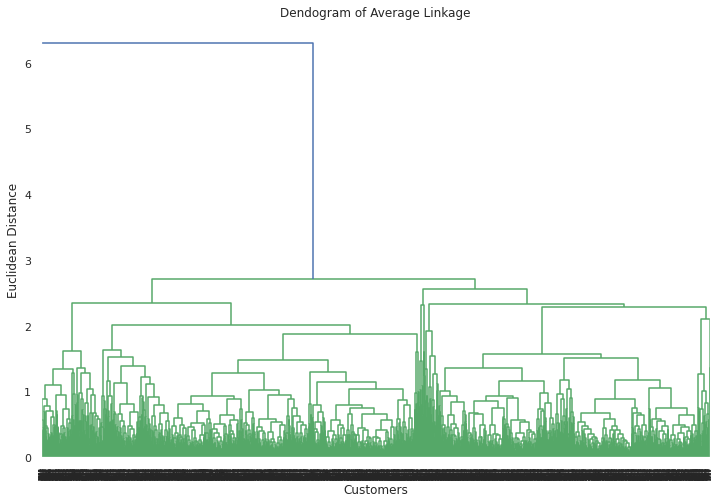

In [107]:
# # avg linkage
dendogram = sch.dendrogram(sch.linkage(final_df_scaled, metric = 'euclidean', method = 'average'))

plt.title('Dendogram of Average Linkage');
plt.xlabel('Customers');
plt.ylabel('Euclidean Distance');
plt.show();

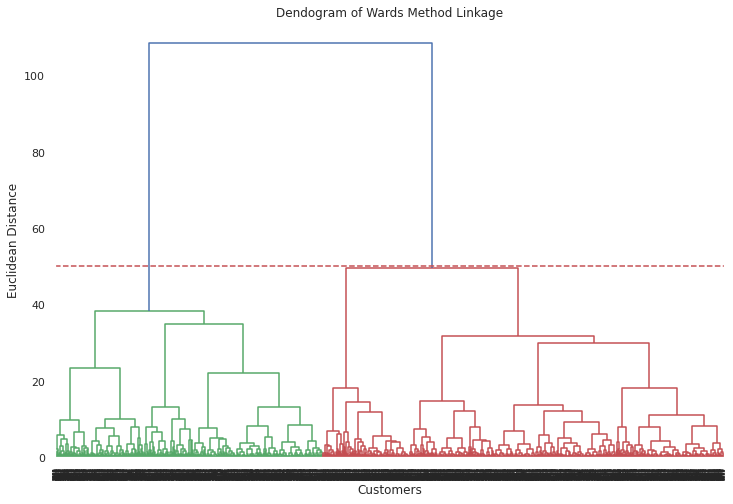

In [108]:
# # wards linkage
dendogram = sch.dendrogram(sch.linkage(final_df_scaled, metric = 'euclidean', method = 'ward'))
plt.axhline(y=50, color='r', linestyle='--')
plt.title('Dendogram of Wards Method Linkage');
plt.xlabel('Customers');
plt.ylabel('Euclidean Distance');
plt.show();

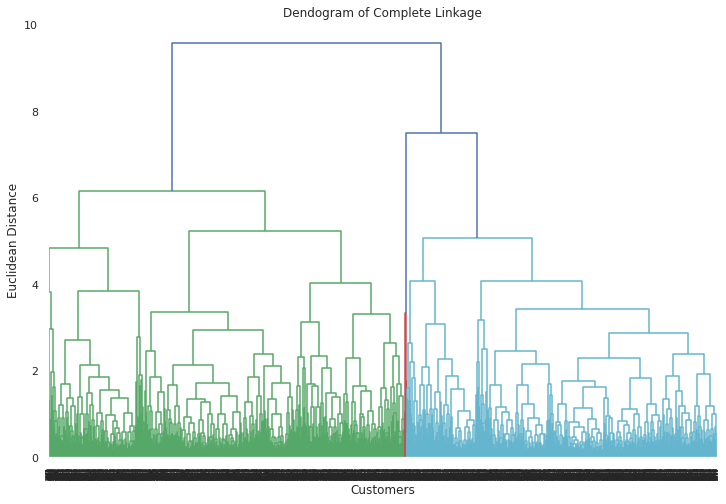

In [109]:
# Complete linkage
mergings = sch.linkage(final_df_scaled, method="complete", metric='euclidean')
sch.dendrogram(mergings)

plt.title('Dendogram of Complete Linkage');
plt.xlabel('Customers');
plt.ylabel('Euclidean Distance');
plt.show()

# Cutting Dendrogram based on K

In [110]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [111]:
# Assign cluster labels
merged['Cluster_Labels'] = cluster_labels
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency,Total_Amount_log,Frequency_log,Recency_log,Cluster_no,Cluster_Labels
1,12347.0,182,4310.00,1,8.368925,5.209486,0.693147,2,0
2,12348.0,31,1797.24,74,7.494564,3.465736,4.317488,0,1
3,12349.0,73,1757.55,18,7.472245,4.304065,2.944439,2,0
4,12350.0,17,334.40,309,5.815324,2.890372,5.736572,1,1
5,12352.0,85,2506.04,35,7.826858,4.454347,3.583519,2,0


# DBSCAN

In [112]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(final_df_scaled)
distances, indices = nbrs.kneighbors(final_df_scaled)

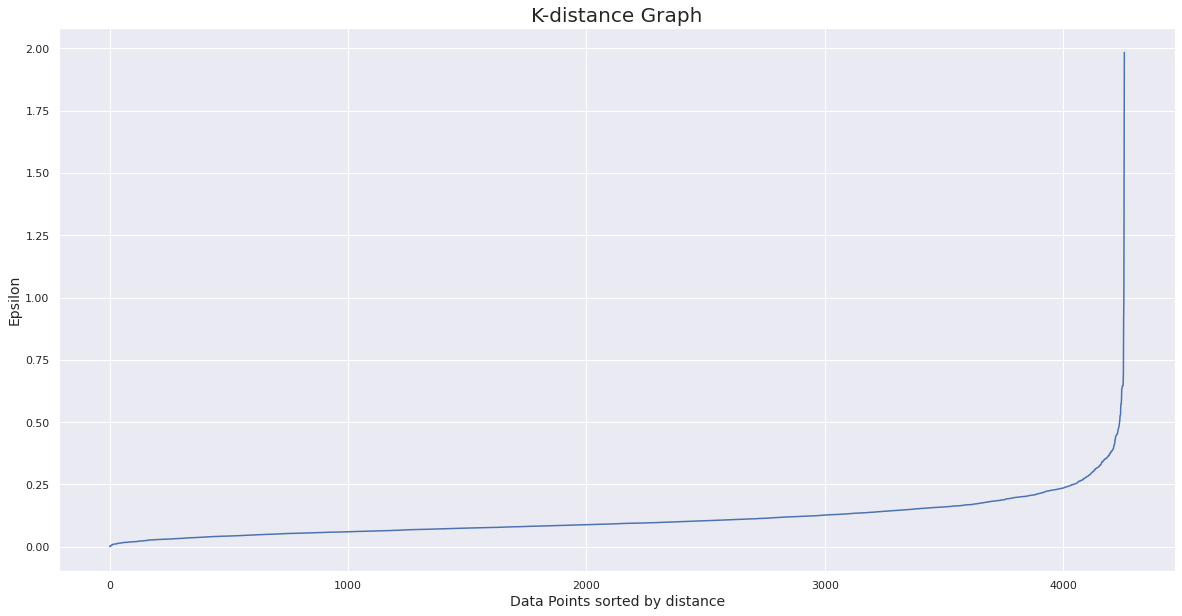

In [113]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [114]:
# importing algo
from sklearn.cluster import DBSCAN

In [115]:
# for i in range(1, 11):
db = DBSCAN(min_samples = 6, algorithm = 'kd_tree', eps = 0.5).fit(final_df_scaled)

In [116]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
merged['dbscan_labels'] = db.labels_
merged.head()

,CustomerID,Frequency,Total_Amount_Spent,Recency,Total_Amount_log,Frequency_log,Recency_log,Cluster_no,Cluster_Labels,dbscan_labels
1,12347.0,182,4310.00,1,8.368925,5.209486,0.693147,2,0,0
2,12348.0,31,1797.24,74,7.494564,3.465736,4.317488,0,1,0
3,12349.0,73,1757.55,18,7.472245,4.304065,2.944439,2,0,0
4,12350.0,17,334.40,309,5.815324,2.890372,5.736572,1,1,0
5,12352.0,85,2506.04,35,7.826858,4.454347,3.583519,2,0,0


In [118]:
merged.dbscan_labels.nunique()

3

# Conclusions from DBSCAN:
* There are total three clusters.